In [1]:
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carga de datos

In [2]:
# Cargamos los datos
df_marketing = pd.read_csv("marketing_campaign.csv",index_col="ID", delimiter="\t")
df_marketing.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df_marketing.shape

(2240, 28)

In [4]:
df_marketing.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
# Convertimos las columnas categoricas a numericas.
df_marketing["Education"] = df_marketing["Education"].astype("category").cat.codes
df_marketing["Marital_Status"] = df_marketing["Marital_Status"].astype("category").cat.codes

In [6]:
# Comprobamos si hay valores nulos
df_marketing.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Por lo visto tenemos un total de 24 valores nulos en la columna "Income" y vamos a tratar de predecir y rellenar esos valores utilizando el modelo de regresion visto en clases anteriores.

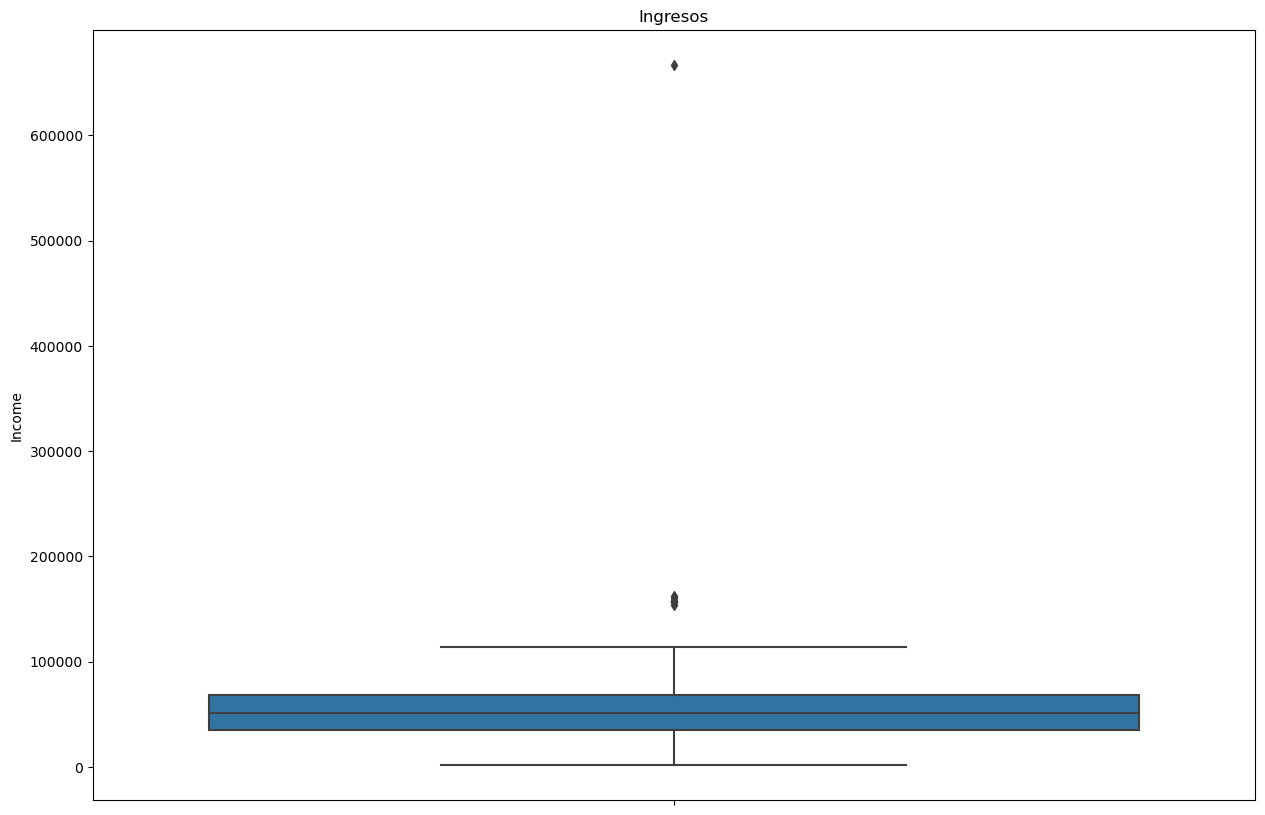

In [7]:
# Buscamos valores atípicos en la columna 'income'
plt.figure(figsize=(15,10))

plt.title("Ingresos")
sns.boxplot(y=df_marketing.Income)
plt.show()

In [8]:
# Por lo visto en el grafico anterior tenemos un valor en la columna "income" atípico y vamos a eliminarlo
df_marketing["Income"].sort_values(ascending=False).head(10)

ID
9432     666666.0
1503     162397.0
1501     160803.0
5336     157733.0
8475     157243.0
4931     157146.0
11181    156924.0
5555     153924.0
4619     113734.0
4611     105471.0
Name: Income, dtype: float64

In [9]:
# Voy a eliminar los ingresos superiores a 150000 por que son valores atípicos.
_ = df_marketing[df_marketing["Income"] > 150000].index
df_marketing = df_marketing.drop(labels=_, axis=0)

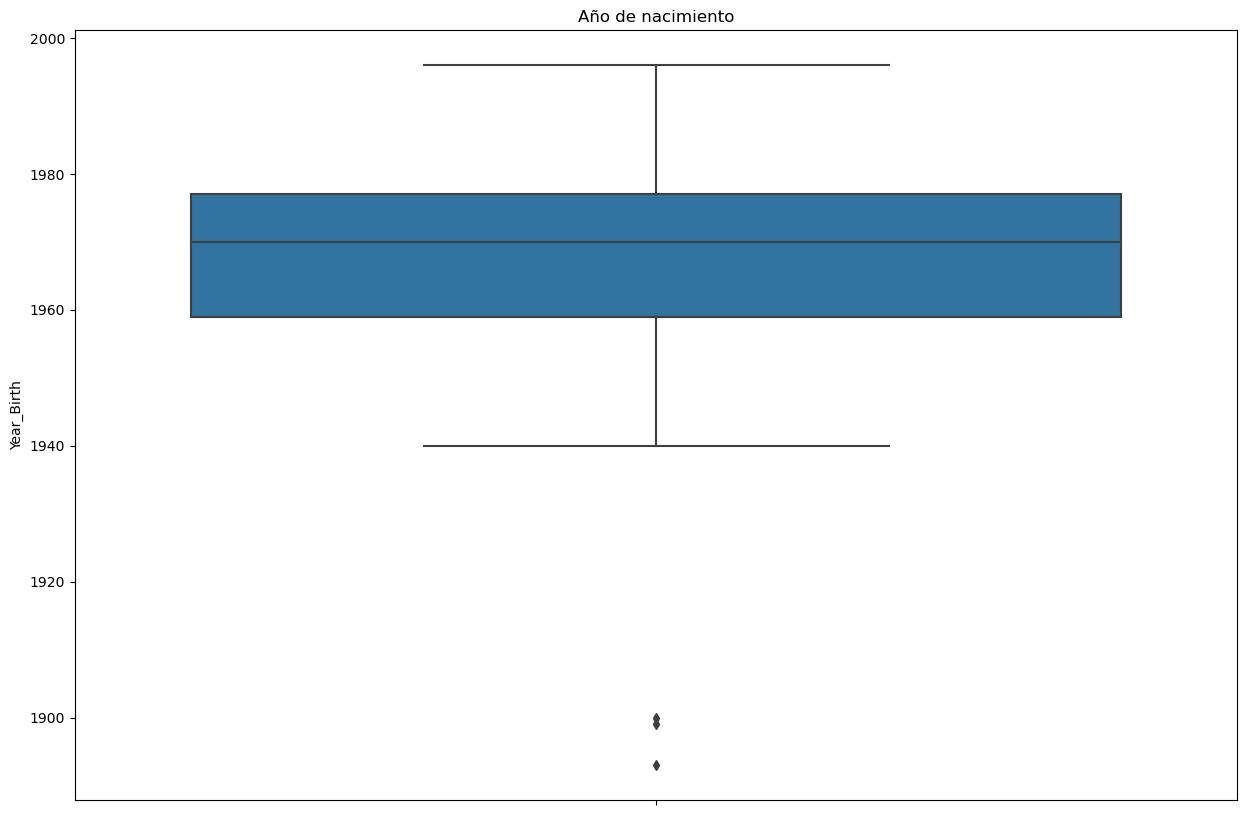

In [10]:
# Comprobamos si hay valores atípicos en la columna 'Year_Birth'
plt.figure(figsize=(15,10))

plt.title("Año de nacimiento")
plt.ylabel("Año de nacimiento")
sns.boxplot(y=df_marketing.Year_Birth)
plt.show()

In [11]:
# En el grafico superior tambien tenemos 3 valores atípicos y los eliminamos.
df_marketing["Year_Birth"].sort_values(ascending=False).tail(10)

ID
4994     1943
5250     1943
2968     1943
6142     1943
7106     1943
6932     1941
6663     1940
7829     1900
1150     1899
11004    1893
Name: Year_Birth, dtype: int64

In [12]:
_ = df_marketing[df_marketing["Year_Birth"] <= 1900].index
df_marketing = df_marketing.drop(labels=_, axis=0)

In [13]:
# Realizo un bucle for para ver el tipo de datos de cada columno y cuantos hay de cada.
for n in range(2,len(df_marketing.columns)):
    print(df_marketing.iloc[:,n].value_counts())

3    861
5    575
4    479
2    230
6     77
1      3
0      2
7      2
Name: Marital_Status, dtype: int64
7500.0     12
35860.0     4
83844.0     3
46098.0     3
48432.0     3
           ..
72258.0     1
51124.0     1
74250.0     1
40760.0     1
52869.0     1
Name: Income, Length: 1963, dtype: int64
0    1286
1     895
2      48
Name: Kidhome, dtype: int64
0    1150
1    1027
2      52
Name: Teenhome, dtype: int64
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
03-02-2014     1
24-05-2013     1
09-11-2013     1
13-08-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64
56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64
2      41
5      40
6      37
1      35
4      33
       ..
806     1
285     1
61      1
986     1
428     1
Name: MntWines, Length: 775, dtype: int64
0      398
1      158
2      119
3      116
4      104
  

# Prediccion de resultados nulos utilizando el modelo de regresion

En vez de eliminar las filas con valores nulos, he decidido predecir esos resultados utilizando el modelo de regresión.

In [14]:
# Guargamos las filas que tienen valores nulos en la culumna "Income" en una variable
df_marketing_na = df_marketing[df_marketing["Income"].isna()]
df_marketing_na

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
1994,1983,2,3,NaN,1,0,15-11-2013,11,5,5,...,7,0,0,0,0,0,0,3,11,0
5255,1986,2,4,NaN,1,0,20-02-2013,19,5,1,...,1,0,0,0,0,0,0,3,11,0
7281,1959,4,4,NaN,0,0,05-11-2013,80,81,11,...,2,0,0,0,0,0,0,3,11,0
7244,1951,2,4,NaN,2,1,01-01-2014,96,48,5,...,6,0,0,0,0,0,0,3,11,0
8557,1982,2,4,NaN,1,0,17-06-2013,57,11,3,...,6,0,0,0,0,0,0,3,11,0
10629,1973,0,3,NaN,1,0,14-09-2012,25,25,3,...,8,0,0,0,0,0,0,3,11,0
8996,1957,4,3,NaN,2,1,19-11-2012,4,230,42,...,9,0,0,0,0,0,0,3,11,0
9235,1957,2,4,NaN,1,1,27-05-2014,45,7,0,...,7,0,0,0,0,0,0,3,11,0
5798,1973,3,5,NaN,0,0,23-11-2013,87,445,37,...,1,0,0,0,0,0,0,3,11,0


In [15]:
# Eliminamos las filas con los registros nulos de nuestro DataFrame
lista_na = df_marketing_na.index.tolist()
df_marketing = df_marketing.drop(labels=lista_na, axis=0)
df_marketing["Income"].isna().sum()

0

In [16]:
# Creamos las variables para entrenar nuestro modelo.
x = df_marketing[['Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response']]
y = df_marketing["Income"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [17]:
# Craemos el modelo y lo entrenamos con el conjunto de entrenamiento
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
# Testeo del modelo
y_pred = lr.predict(x_test)

In [19]:
print("Error cuadratico medio: ", round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("Coeficiente de determinacion: ", round(r2_score(y_test, y_pred),2))

Error cuadratico medio:  8949.76
Coeficiente de determinacion:  0.8


Tenemos un coeficiente de determinacion de un 80%, por lo tanto nuestro modelo es bastante preciso.
Vamos a predecir los resultados nulos e introducirlos en en DataFrame.

In [21]:
# Craemos la variable x1, que son los datos que vamos a utilizar para predecir la columna 'income' con valores nulos.
x1 = df_marketing_na[['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response']]

# Predecimos los valores de la columna 'income'
df_marketing_na["Income"] = lr.predict(x1)

In [22]:
# Unimos los 2 DataFrames.
df_marketing = pd.concat([df_marketing, df_marketing_na])
df_marketing

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.000000,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,2,4,46344.000000,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,2,5,71613.000000,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,2,5,26646.000000,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,4,3,58293.000000,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,1971,2,3,32578.857176,1,1,03-03-2013,82,71,1,...,8,0,0,0,0,0,0,3,11,0
10339,1954,3,5,43071.355788,0,1,23-06-2013,83,161,0,...,6,0,0,0,0,0,0,3,11,0
3117,1955,2,4,43996.155642,0,1,18-10-2013,95,264,0,...,7,0,0,0,0,0,0,3,11,0


In [23]:
# Eliminamos las columnas que nos ofrecen unos datos muy pobres, donde la mayoria de registros son 0, o todos los registros son iguales.
df_marketing = df_marketing.drop(labels=["Z_Revenue", "Z_CostContact", "Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], axis=1)

# Tambien eliminamos la columna Dt_Customer ya que las fechas son muy proximas entre si y considero que no son relevantes.
df_marketing = df_marketing.drop(labels=["Dt_Customer"], axis=1)

In [24]:
df_marketing.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response'],
      dtype='object')

## Creacion del modelo de clustering

### Seleccion de la mejor K

In [36]:
# Craemos una lista llamada 'inertias'
# La inertia la vamos a mostrar para pintar un gráfico lineal y nos va a ayudar a decidir que valor asignarle a la variable k
# dependiendo de a que altura se forme 'el codo' en el eje X.
inertias = []

for k in range(1,16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_marketing[df_marketing.columns])
    inertias.append(kmeans.inertia_)

C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

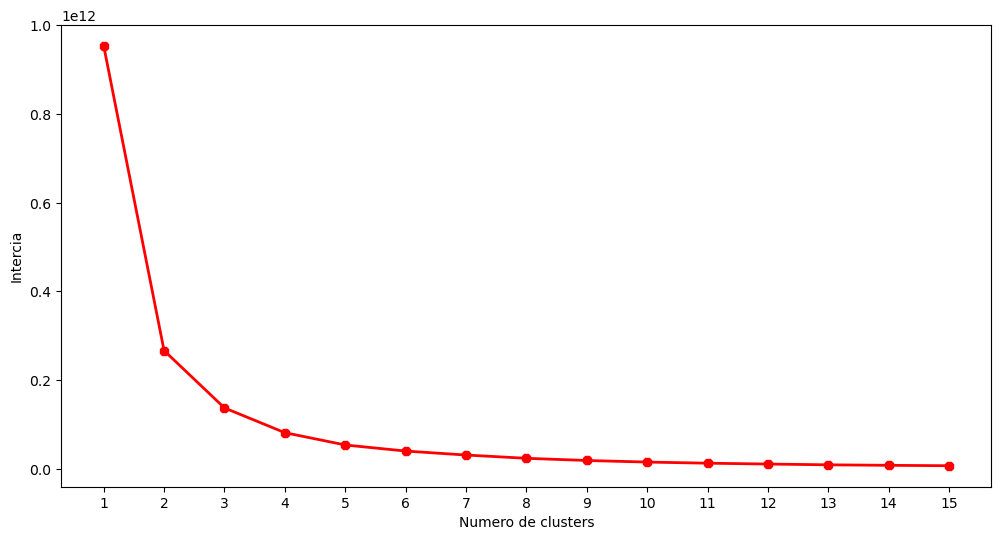

In [37]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), inertias, linewidth=2, color="red", marker="8")
plt.xlabel("Numero de clusters")
plt.xticks(range(1,16))
plt.ylabel("Intercia")

plt.show()

In [38]:
# Vamos a escoger k=3.

km = KMeans(n_clusters=3)
clusters = km.fit_predict(df_marketing[df_marketing.columns])

df_marketing["cluster"] = clusters
df_marketing.head()


C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,cluster
ID,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1,2
2174,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,2
4141,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,1
6182,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
5324,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,2


En este caso la variable 'k' es el numero de clusters que queremos representar, es decir, el numero de grupos en los cuales vamos a dividir los datos. Al utilizar k=3 vamos a obtener solo 3 grupos diferentes.

In [40]:
fig = px.scatter_3d(df_marketing,
                    x="Income",
                    y="NumStorePurchases",
                    z="MntMeatProducts",
                    color="cluster")

fig.update_layout(autosize=False,
                 width=1000,
                 height=800)

fig.show()

En el grafico superior podemos observar que las personas que mas personas compran en tienda y consumen mas productos cárnicos son las personas con mayores ingresos. Por el contrario las personas de bajos ingresos compran muy poco en tienda y apenas compran carne.

In [41]:
fig = px.scatter_3d(df_marketing,
                    x="Income",
                    y="Kidhome",
                    z="MntFruits",
                    color="cluster")

fig.update_layout(autosize=False,
                 width=1000,
                 height=800)

fig.show()

### Conclusion

Tras haber probado con un valor de K igual a 2,3,4 finalmente nos quedamos con un valor de k igual a 3 por que nos da un mejor resultado a la hora de dividir los grupos. Podemos observar que la division de grupos la hace en funcion de los ingresos donde el primer rango va desde 0 hasta 39K, el segundo rango va desde 39K hasta 63K y el a partir de los 63K. 
Por ejemplo, del grafico superior podemos concluir que las personas que más fruta compra son las personas sin hijos y con unos igresos superiores. Por lo tanto, a este supermercado le interesa tener más calidad y más variedad en la sección de frutas en zonas pobladas con altos ingresos y baja tasa de natalidad, por otro lado debe almacenar mucha menos cantidad de fruta en zonas con bajos ingresos y un alto indice de natalidad para que derrochar estos productos, lo que supone perdidas.